In [10]:
def strip_punctuation(value):
    punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", "#", "@"]
    for ch in punctuation_chars:
        value = value.replace(ch, "")
    return value

In [11]:
# list of positive words to use
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ";" and lin[0] != "\n":
            positive_words.append(lin.strip())

In [12]:
# list of negative words to use
negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ";" and lin[0] != "\n":
            negative_words.append(lin.strip())

In [15]:
def get_pos(text):
    num_positive = 0
    for word in text.split():
        if strip_punctuation(word.lower()) in positive_words:
            num_positive += 1
    return num_positive

In [16]:
def get_neg(text):
    num_negative = 0
    for word in text.split():
        if strip_punctuation(word.lower()) in negative_words:
            num_negative += 1
    return num_negative

In [17]:
twitter_data = []
with open("project_twitter_data.csv") as inf:
    for line in inf:
        twitter_data.append(line.strip().split(","))
    twitter_data = twitter_data[1:]  # skip header row

In [18]:
with open("resulting_data.csv", "w") as outf:
    outf.write("Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score\n")
    for tweet in twitter_data:
        pos_score = get_pos(tweet[0])
        neg_score = get_neg(tweet[0])
        net_score = pos_score - neg_score
        outf.write("{0},{1},{2},{3},{4}\n".format(tweet[1], tweet[2], pos_score, neg_score, net_score))

Text(0.5, 1.0, 'Sample Sentiment Analysis Results')

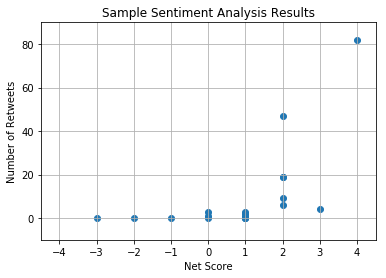

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

x = []
y = []
for tweet in twitter_data:
    x.append(get_pos(tweet[0]) - get_neg(tweet[0]))
    y.append(int(tweet[1]))

plt.scatter(x, y)
plt.grid(True)
plt.axis([-4.5, 4.5, -10, 90])
plt.ylabel("Number of Retweets")
plt.xlabel("Net Score")
plt.title("Sample Sentiment Analysis Results")